# Linear Regression Model

Linear Regression is one of the simplest and most commonly used algorithms for predictive modeling. It predicts a target variable \( y \) based on the relationship between input features \( x_1, x_2, \dots, x_n \).

## 1. Linear Regression Equation

The general form of a linear regression model is:

\[
y = w_1 x_1 + w_2 x_2 + \dots + w_n x_n + b
\]

Where:
- \( y \): Target variable
- \( x_1, x_2, \dots, x_n \): Input features (independent variables)
- \( w_1, w_2, \dots, w_n \): Weights (coefficients) for each input feature
- \( b \): Bias (intercept)

For simple linear regression, where we only have one input feature:

\[
y = w_1 x_1 + b
\]    

# Ridge Regression - Closed-Form Solution

Ridge Regression is a regularized version of linear regression that introduces a penalty to the size of the coefficients in order to prevent overfitting. The penalty term is controlled by a hyperparameter called the **regularization parameter** \( \lambda \) (often denoted as alpha).

## Ridge Regression Formula

The **closed-form solution** for Ridge Regression is given by:

\[
w = (X^T X + \lambda I)^{-1} X^T y
\]

# Lasso Regression

## Overview

**Lasso Regression** (Least Absolute Shrinkage and Selection Operator) is an extension of linear regression that adds a regularization term to the cost function. The regularization term used in Lasso regression is an **L1 penalty**, which helps in feature selection and shrinking coefficients, thus preventing overfitting and making the model simpler.

### Lasso Regression Formula

The cost function for Lasso Regression is modified from the standard linear regression cost function by adding an L1 penalty term:

\[
\text{Cost function} = \text{RSS} + \lambda \sum_{j=1}^{p} |w_j|
\]

Where:
- **RSS**: Residual Sum of Squares, which measures the difference between predicted values and actual values.
- **\( \lambda \)**: The regularization parameter, controlling the strength of the penalty. A higher value of \( \lambda \) increases the penalty.
- **\( w_j \)**: The coefficients of the features in the model.
- \( \sum_{j=1}^{p} |w_j| \): The sum of the absolute values of the coefficients, which is the L1 penalty.


In [108]:
# 1. Load the black friday data set
# 2. Clean the dataset
# 3. Perform EDA analysis.
# 4. Generate visualizations using matplotlib and seaborns.
# 5. Explain what you observe from the visualization.
# 6. Create Feature selection variables
# 7. select Target Variable
# 8. split the data into two parts training and testing.
# 9. start implementing the models one by one.
# 10. calculate the predictions for all the three models.
# 11. Compare the three R^2 scores in matplotlib.

In [109]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score

In [110]:
import pandas as pd
df = pd.read_csv('black-friday.csv')
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [111]:
df.isna().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [112]:
# 2. Clean the dataset
# Handling missing values
df.fillna({'Product_Category_2': df['Product_Category_2'].mode()[0], 
           'Product_Category_3': df['Product_Category_3'].mode()[0]}, inplace=True)

In [113]:
# Encoding categorical variables
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['Age'] = label_encoder.fit_transform(df['Age'])
df['City_Category'] = label_encoder.fit_transform(df['City_Category'])
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].str.replace('+', '')
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].astype(int)


In [114]:
df.isna().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

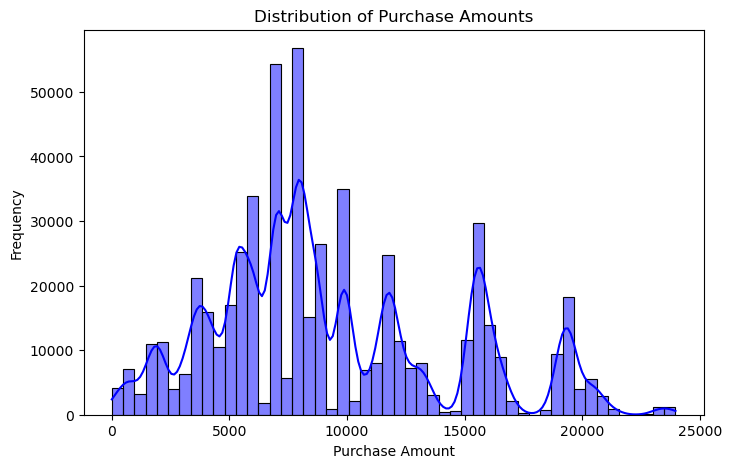

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  int32  
 3   Age                         550068 non-null  int32  
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  int32  
 6   Stay_In_Current_City_Years  550068 non-null  int32  
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          550068 non-null  float64
 10  Product_Category_3          550068 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int32(4), int64(5), object(1)
memory usage: 42.0+ MB


In [115]:

# 3. Perform EDA
plt.figure(figsize=(8, 5))
sns.histplot(df['Purchase'], bins=50, kde=True, color='blue')
plt.title("Distribution of Purchase Amounts")
plt.xlabel("Purchase Amount")
plt.ylabel("Frequency")
plt.show()

df.info()

In [116]:
df.describe()

,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,0.753105,2.496430,8.076707,1.042640,1.858418,0.409653,5.404270,9.260768,14.989567,9263.968713
std,1.727592e+03,0.431205,1.353632,6.522660,0.760211,1.289443,0.491770,3.936211,4.294093,2.739846,5023.065394
min,1.000001e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,1.000000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,8.000000,16.000000,5823.000000
50%,1.003077e+06,1.000000,2.000000,7.000000,1.000000,2.000000,0.000000,5.000000,8.000000,16.000000,8047.000000
75%,1.004478e+06,1.000000,3.000000,14.000000,2.000000,3.000000,1.000000,8.000000,14.000000,16.000000,12054.000000
max,1.006040e+06,1.000000,6.000000,20.000000,2.000000,4.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [117]:
df.duplicated().sum()

0

In [118]:
df.isna().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [119]:
# 4. Generate visualizations
def plot_bar(feature):
    plt.figure(figsize=(8, 5))
    sns.barplot(x=df[feature], y=df['Purchase'], estimator=np.mean, palette='viridis')
    plt.title(f"Average Purchase by {feature}")
    plt.xlabel(feature)
    plt.ylabel("Average Purchase")
    plt.show()

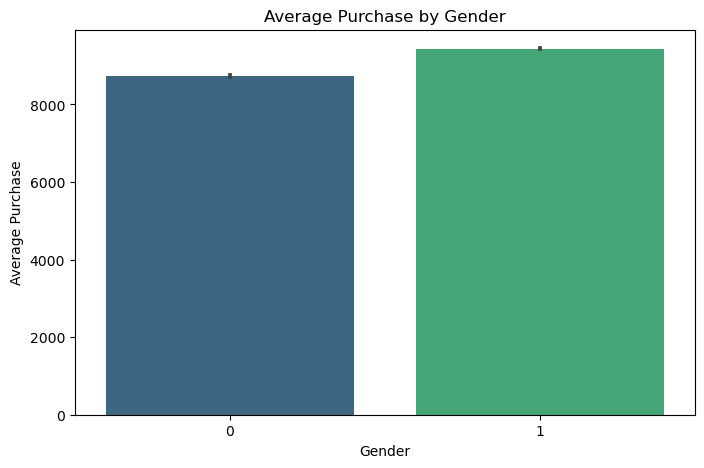

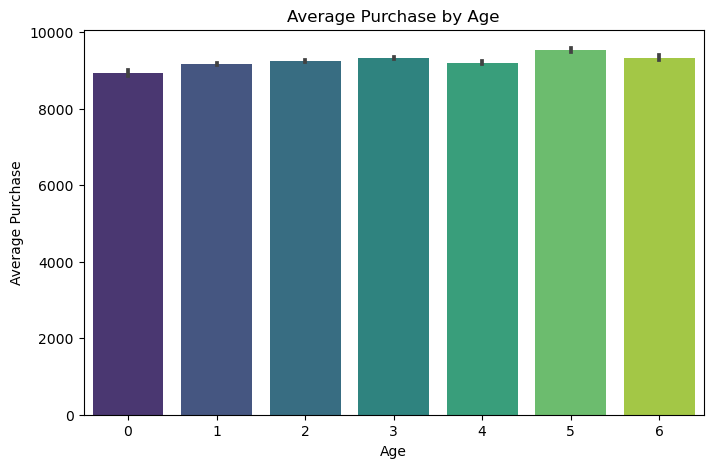

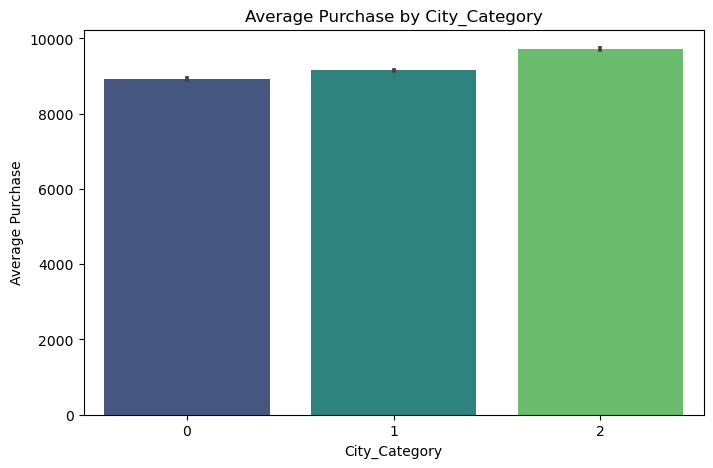

In [120]:
plot_bar('Gender')
plot_bar('Age')
plot_bar('City_Category')

In [121]:
# 6. Feature selection
X = df.drop(columns=['Purchase', 'User_ID', 'Product_ID'])

In [122]:
# 7. Select Target Variable
y = df['Purchase']

In [123]:
# 8. Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [124]:
# 9. Train models
model = LinearRegression()
model.fit(X_train, y_train)
y_pred_lr = model.predict(X_test)

In [125]:
# Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)
r2_ridge = r2_score(y_test, y_pred_ridge)

In [126]:
# Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)
r2_lasso = r2_score(y_test, y_pred_lasso)

In [127]:
# 10. Calculate R^2 scores
r2_lr = r2_score(y_test, y_pred_lr)
r2_dt = r2_score(y_test, y_pred_dt)
r2_rf = r2_score(y_test, y_pred_rf)

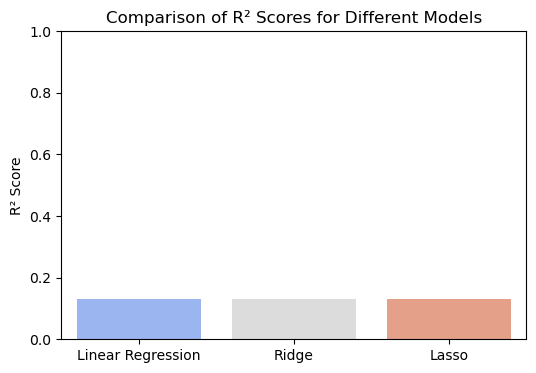

In [133]:
# 11. Compare R^2 scores
plt.figure(figsize=(6, 4))
sns.barplot(x=['Linear Regression', 'Ridge', 'Lasso'], 
            y=[r2_lr, r2_ridge, r2_lasso], palette='coolwarm')
plt.title("Comparison of R² Scores for Different Models")
plt.ylabel("R² Score")
plt.ylim(0, 1)
plt.show()

In [131]:
# Print R² scores
print(f"Linear Regression R²: {r2_lr:.4f}")
print(f"Ridge Regression R²: {r2_ridge:.4f}")
print(f"Lasso Regression R²: {r2_lasso:.4f}")

Linear Regression R²: 0.1301
Ridge Regression R²: 0.1301
Lasso Regression R²: 0.1301
